# Лабораторная работа по заданию №  3. Алгоритмы безусловной нелинейной оптимизации. Методы первого и второго порядка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, leastsq

### Объявление базовых функций, создание исходного массива

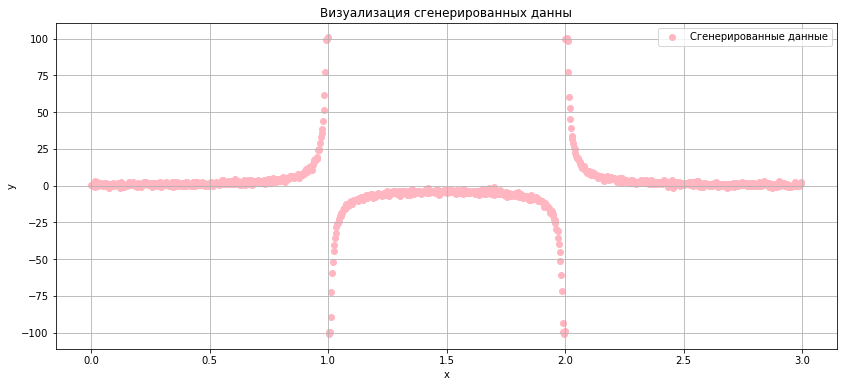

In [4]:
x_array=[]
y_array=[]

def rat_approx(x, a, b, c, d):
    return (a*x+b)/(x**2+x*c+d)

def main_func(x):
    sigma=np.random.normal()    
    def f_x_func(x):
        return 1/(x**2-3*x+2)    
    if f_x_func(x)<-100:
        y=-100+sigma
    if -100<=f_x_func(x)<=100:
        y=f_x_func(x)+sigma    
    if f_x_func(x)>100:
        y=100+sigma
    return y

def sq_function_rat(params):
    a, b, c, d = params
    summ=0
    for i in range (1000):
        summ=summ+(rat_approx(x_array[i], a, b, c, d)-y_array[i])**2
    return summ

for i in range (1000):    
    x=3*i/1000
    y=main_func(x)    
    x_array.append(x)
    y_array.append(y)
    
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
leg = plt.legend()
ax.set(xlabel='x', ylabel='y',title='Визуализация сгенерированных данны')
ax.grid()
plt.show()

### Рациональная аппроксимация с минимизацией методом Нелдера-Мида

Optimization terminated successfully.
         Current function value: 136644.728869
         Iterations: 402
         Function evaluations: 678

Метод Нелдера-Мида:
a=-0.9990550808140892, b=0.9995567755364306, c=-2.0009453982549017, d=1.0009614934762405


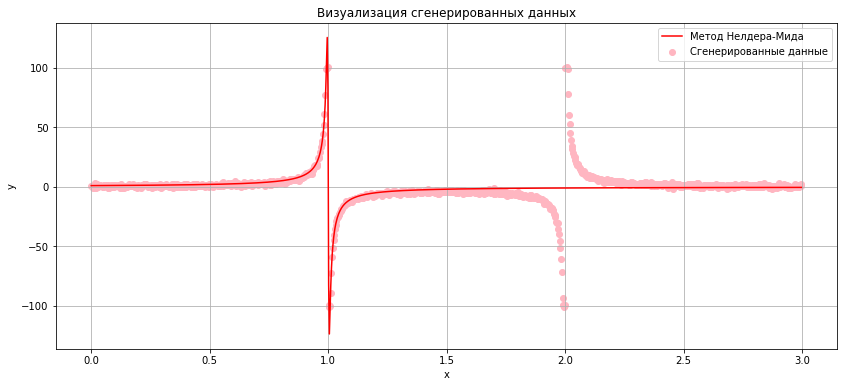

In [9]:
params=[0.5, 0.5, 0.5, 0.5]
res = minimize(sq_function_rat, params,  method='nelder-mead',
    options={'xtol': 0.001, 'disp': True})
nm_rat=res.x
nm_rat_approx_array=[ rat_approx(x, nm_rat[0], nm_rat[1], nm_rat[2], nm_rat[3]) for x in x_array]
print('\nМетод Нелдера-Мида:\na='+str(nm_rat[0])+', b='+str(nm_rat[1])+', c='+str(nm_rat[2])+', d='+str(nm_rat[3]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, nm_rat_approx_array, color='red', label='Метод Нелдера-Мида')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
leg = plt.legend()
ax.set(xlabel='x', ylabel='y',title='Визуализация сгенерированных данных')
ax.grid()
plt.show()

### Рациональная аппроксимация с минимизацией методом Левенбега-Марквардта

In [5]:
#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_rat_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    c = params[2]
    d = params[3]
    (a*x+b)/(x**2+x*c+d)
    return((a/(1 + b*np.array(x))) - np.array(y))